In [1]:
import numpy as np
import matplotlib.pyplot as plt
import utils as ut

## Analysis of the invasion probability ratio

In [5]:
# these two string must be passed during the execution of invasion_prob.exe
data_dir = '../data/inv_prob/plotkin/'

### Setting the parameters

In [37]:
params = dict()

# General parameters
params['process_type'] = 'plotkin2'
params['N_init_cond'] = 200 # -- Number of trajectories at each threshold
params['relax_step'] = 1500 # -- Number of steps for the relaxation of the initial condition
params['thresholds'] = [2, 5, 10, 20, 50, 100, 200, 300, 400, 500, 1000, 10000] 

# Fixed parameters
beta1 = 1
params['M'] = 400

# List of parameters
beta2 = [1,2,3,4,5]
alphas = [0.5,1/3]

params['N_processes'] = len(beta2)*len(alphas)

### Writing the params

In [38]:
count = 1
for a in alphas:
    params['betas'] = [beta1, b2]
    for b2 in beta2:
        params['alpha'] = a
        params['carrying_cap'] = params['M'] * (1/a-1)
        ut.write_params(params, data_dir, str(count)+'_param.txt')
        params['betas'] = [b2, beta1]
        ut.write_params(params, data_dir, str(count)+'sw_param.txt')
        count += 1

### Importing the results and comparing with theory

In [34]:
plot_dir = '../plots/'

In [35]:
inv_p, inv_p_sw = [], []

count = 1
for i in range(len(beta2)):
    aux_p, aux_p_sw = [], []
    for a in range(len(alphas)):
        aux_p.append(float(ut.read_inv_p(data_dir + str(count) + '_inv_p.txt')))
        aux_p_sw.append(float(ut.read_inv_p(data_dir + str(count) + 'sw_inv_p.txt')))
    inv_p.append(aux_p)
    inv_p_sw.append(aux_p_sw)
    count+=1
    
inv_p = np.array(inv_p)
inv_p_sw = np.array(inv_p_sw)

In [36]:
inv_p/inv_p_sw

array([[0.92049098],
       [1.9183565 ],
       [3.77150034]])

In [29]:
inv_p_sw

array([[0.00099589],
       [0.00115551],
       [0.00251285]])

In [16]:
def p_inv_ratio(sMt, r, c):
    alp = sMt * (1+r) / (r+c+r*c)
    return (1+r)**alp*(1+c)**(alp-1)

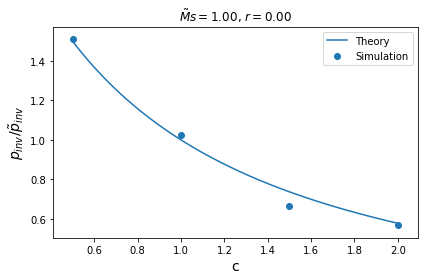

In [17]:
x = np.linspace(0.5,2, 100)
plt.title(r"$\tilde{M}s = %3.2f$, $r=%3.2f$" %(sMts[0], rs[0]))
plt.xlabel("c", fontsize=14)
plt.ylabel(r"$p_{inv}/\tilde{p}_{inv}$", fontsize=14)
plt.plot(x, p_inv_ratio(sMts[0], rs[0], x), label='Theory')
plt.scatter(cs, ratio_list, label='Simulation')
plt.legend()
plt.tight_layout()
plt.savefig(plot_dir+"p_inv.png", dpi=200)

### Analytical study

In [6]:
def alpha(c,r,sM):
    return (sM*(1+r)) / (c+r+r*c)

def ratio(c,r,sM):
    if c==0 and r==0:
        return 1
    return alpha(c,r,sM)*np.log(1+r) + (alpha(c,r,sM)-1)*np.log((1+c))

In [7]:
rs = [-0.95, 0, 20]
sMs = np.linspace(0,20,100)
cs = np.linspace(0,20,100)

x_mat, y_mat, z_mat = [], [], []
for r in rs:
    aux_x_mat, aux_y_mat, aux_z_mat = [], [], []
    for sM in sMs:
        aux2_x_mat, aux2_y_mat, aux2_z_mat = [], [], []
        for c in cs:
            aux2_x_mat.append(sM)
            aux2_y_mat.append(c)
            aux2_z_mat.append(ratio(c,r,sM))
        aux_x_mat.append(aux2_x_mat)
        aux_y_mat.append(aux2_y_mat)
        aux_z_mat.append(aux2_z_mat)
    x_mat.append(aux_x_mat)
    y_mat.append(aux_y_mat)
    z_mat.append(aux_z_mat)

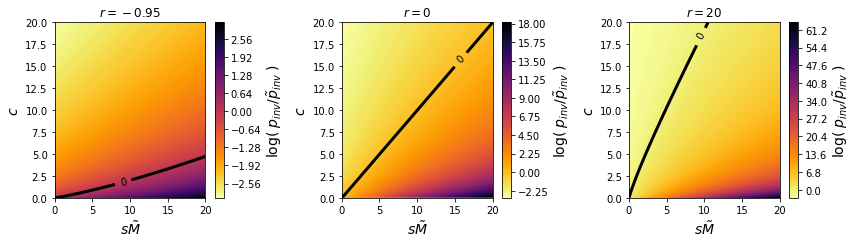

In [8]:
fig, axs = plt.subplots(1,3,figsize=(12,3.5))
maxz = np.max(z_mat)
minz = np.min(z_mat)

for i in range(len(rs)):
    axs[i].set_xlabel(r'$s \tilde{M}$', fontsize=14)
    axs[i].set_ylabel(r'$c$', fontsize=14)
    axs[i].set_title(r'$r={}$'.format(rs[i]))
    cntf = axs[i].contourf(x_mat[i], y_mat[i], z_mat[i], levels=200, cmap='inferno_r')
    cnt = axs[i].contour(x_mat[i], y_mat[i], z_mat[i], levels=[0], colors='black', linewidths=3)
    axs[i].clabel(cnt, fmt='%2.0f')
    
    cb = plt.colorbar(cntf, ax=axs[i])
    cb.set_label(r'$\log(\;p_{inv}/\tilde{p}_{inv}\;)$', fontsize=14)
plt.tight_layout()
#plt.savefig(plot_dir+'phd.png',dpi=200)